<a href="https://colab.research.google.com/github/devanoabe/PCVK_GANJIL_23-24/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRAKTIKUM
Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.

In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


mengubah tingkat kecerahan citra
--------------------------------
masukkan nilai kecerahan : 40


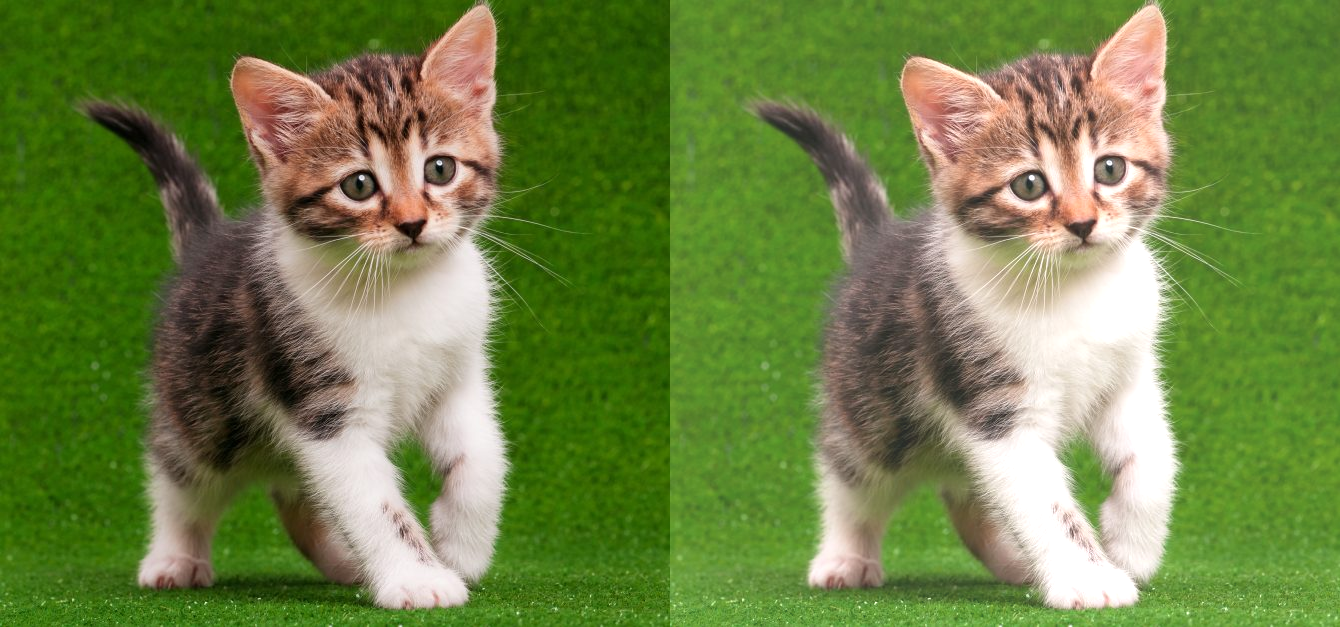

In [2]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
from skimage import transform
from PIL import Image
import matplotlib.pylab as plt
print ('mengubah tingkat kecerahan citra')
print ('--------------------------------')
try:
  brightness = int(input('masukkan nilai kecerahan : '))
except ValueError:
  print('error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK MINGGU 3/Images/kitten01.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta-brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

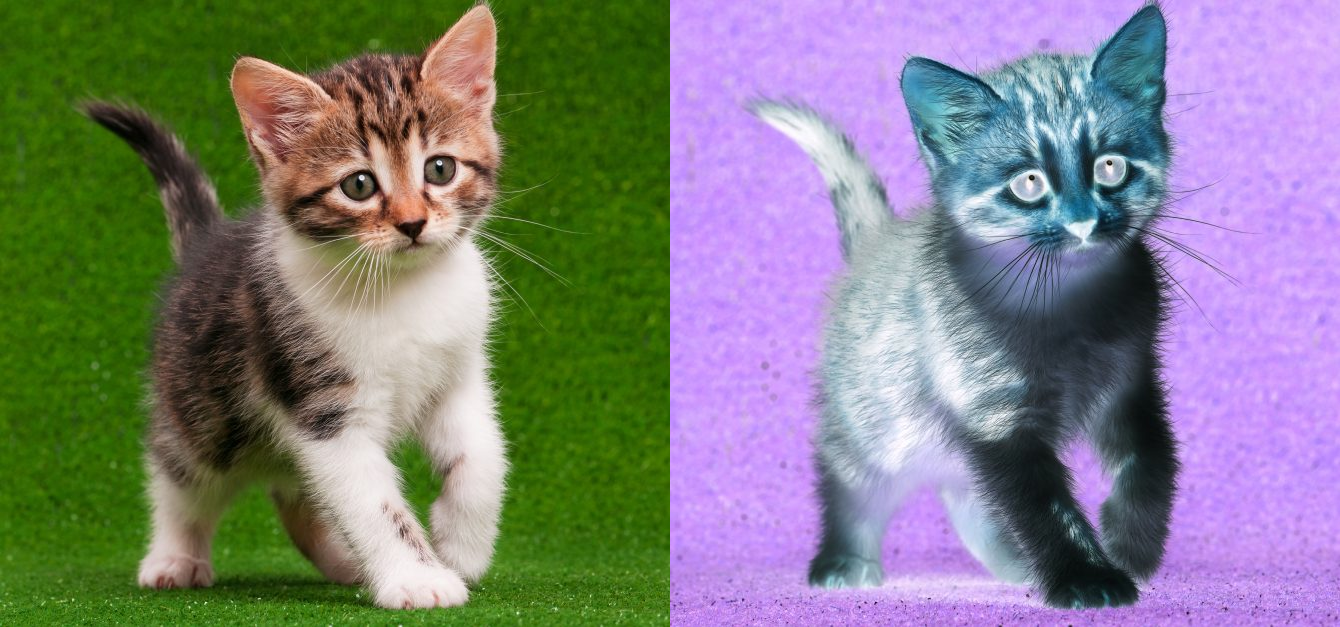

In [3]:
catInv = cv.imread('/content/drive/MyDrive/PCVK MINGGU 3/Images/kitten01.jpg')
height, width, channels = catInv.shape
inverted_cat1 = np.copy(catInv)

for i in range(channels):
    inverted_cat1[:, :, i] = 255 - inverted_cat1[:, :, i]

frame1 = cv.hconcat((catInv, inverted_cat1))
cv2_imshow(frame1)

 Mengubah kontras dan tingkat kecerahan citra
----------------------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 125
Masukkan nilai kontras [1.0 - 3.0]: 2


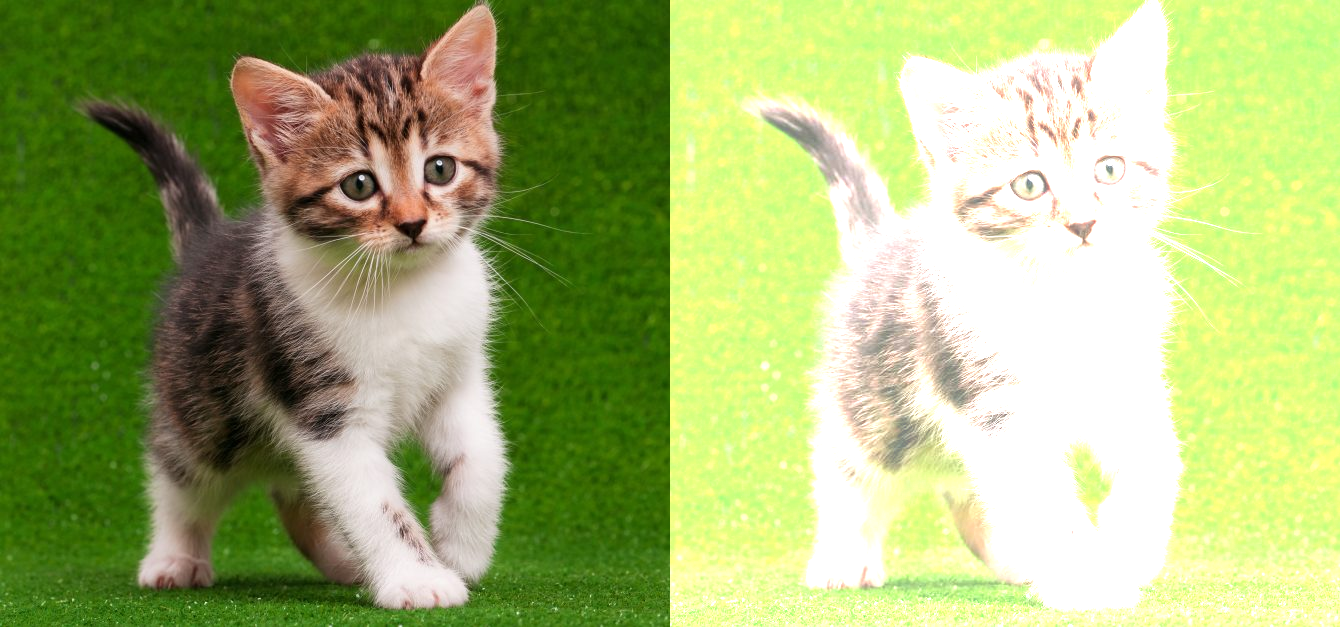

In [5]:
print(' Mengubah kontras dan tingkat kecerahan citra')
print('----------------------------------------------')

#input kecerahan dan kontras
brght = int(input("Masukkan tingkat kecerahan [-255 - 255]: "))
ctr = float(input("Masukkan nilai kontras [1.0 - 3.0]: "))

# mengubah kecerahana dan kontras berdasarkan inputan
catCon = cv.imread('/content/drive/MyDrive/PCVK MINGGU 3/Images/kitten01.jpg')
adjusted_cat2 = cv.convertScaleAbs(catCon, alpha=ctr, beta=brght)

frame2 = cv.hconcat((catCon, adjusted_cat2))
cv2_imshow(frame2)


 Mengubah tingkat kecerahan citra dengan Transformasi Log
----------------------------------------------
Masukkan nilai kecerahan:20


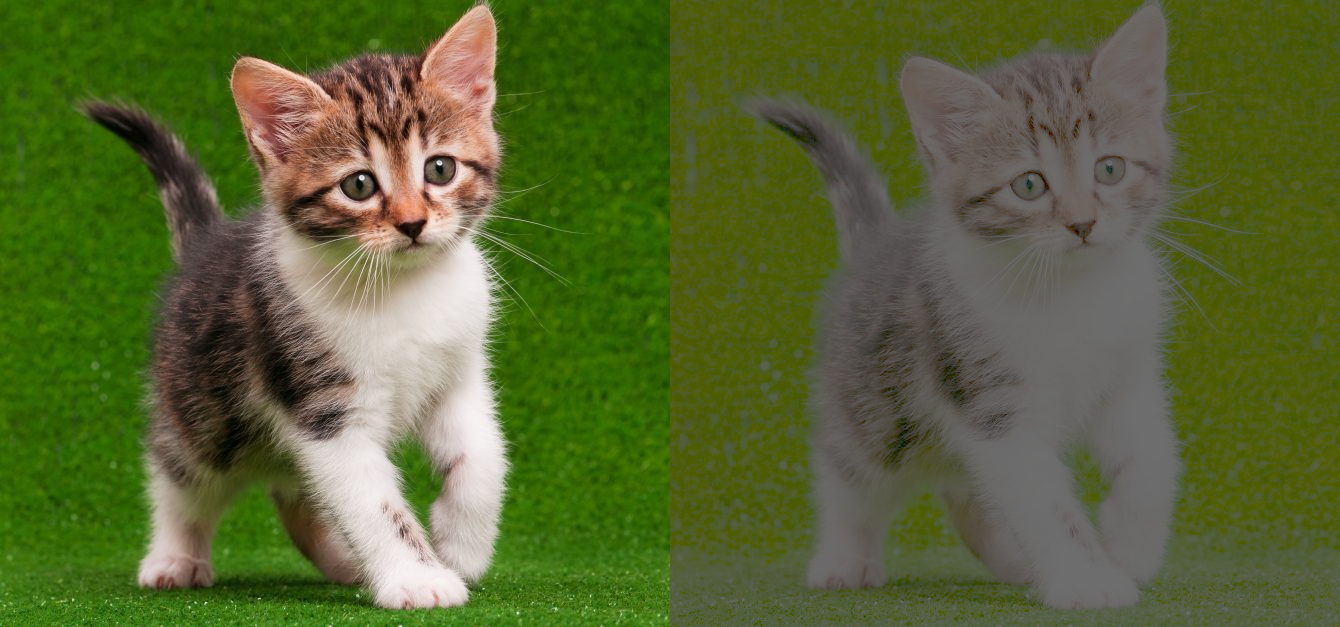

In [7]:
print(' Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('----------------------------------------------')

try:
  bvalue = int(input('Masukkan nilai kecerahan:'))
except ValueError:
  print('Error, not a number')

catCer = cv.imread('/content/drive/MyDrive/PCVK MINGGU 3/Images/kitten01.jpg')
brightness_image = np.zeros(catCer.shape, catCer.dtype)

for y in range(catCer.shape[0]):
  for x in range(catCer.shape[1]):
    for c in range(catCer.shape[2]):
      brightness_image[y,x,c] = np.clip(bvalue*  (np.log(1 + catCer[y,x,c])), 0 , 255)

final_frame = cv.hconcat((catCer, brightness_image))
cv2_imshow(final_frame)

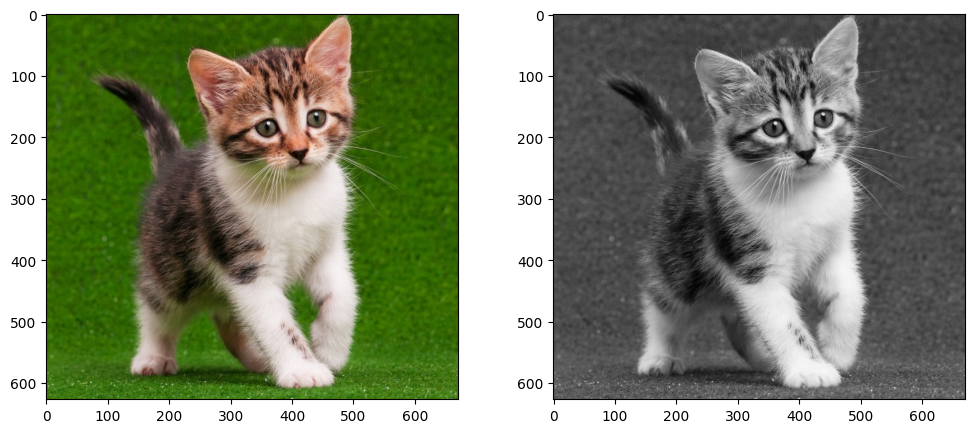

In [9]:

catGa = cv.imread('/content/drive/MyDrive/PCVK MINGGU 3/Images/kitten01.jpg')
grayscale_cat4a = cv.cvtColor(catGa, cv.COLOR_BGR2GRAY)
fig, (original, gray_cat4a) = plt.subplots(1, 2, figsize=(12, 5))

original.imshow(cv.cvtColor(catGa, cv.COLOR_BGR2RGB))
gray_cat4a.imshow(grayscale_cat4a, cmap='gray')

plt.show()

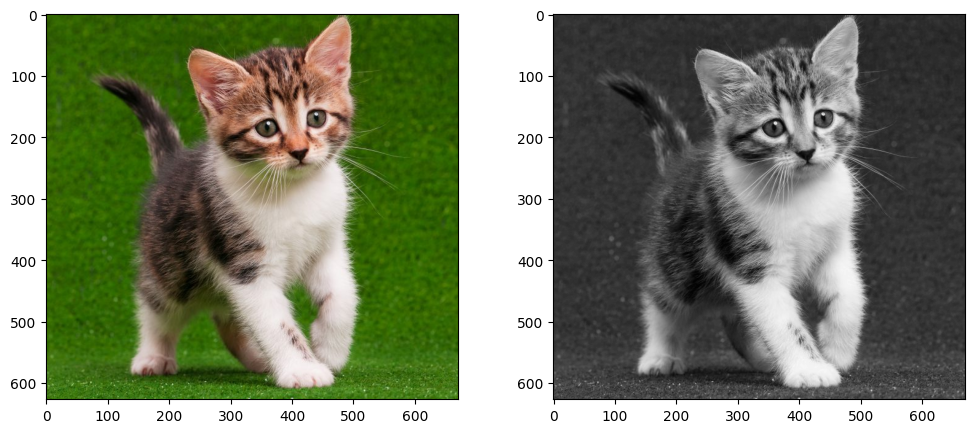

In [10]:
catGb = cv.imread('/content/drive/MyDrive/PCVK MINGGU 3/Images/kitten01.jpg')
hls_cat = cv.cvtColor(catGb, cv.COLOR_BGR2HLS)
l_channel = hls_cat[:, :, 1]
fig, (original, ltcat) = plt.subplots(1, 2, figsize=(12, 5))

original.imshow(cv.cvtColor(catGb, cv.COLOR_BGR2RGB))
ltcat.imshow(l_channel, cmap='gray')

plt.show()

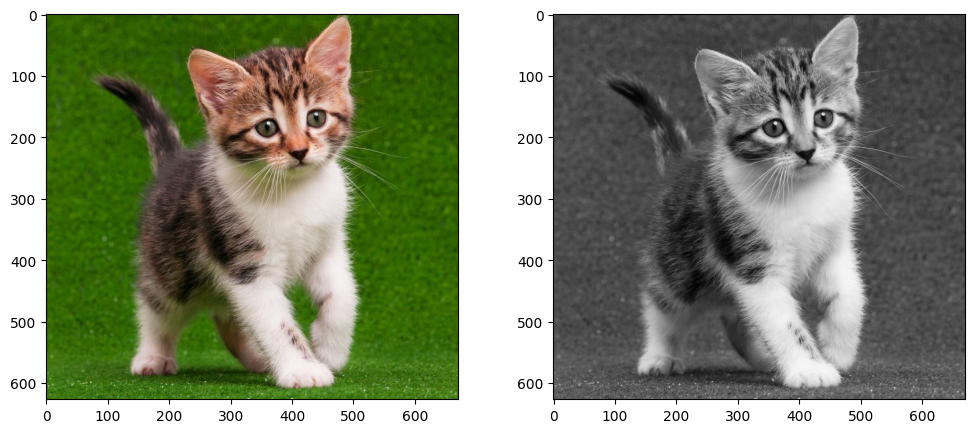

In [11]:

catGc = cv.imread('/content/drive/MyDrive/PCVK MINGGU 3/Images/kitten01.jpg')
yuv_cat = cv.cvtColor(catGc, cv.COLOR_BGR2YUV)
y_channel = yuv_cat[:, :, 0]
fig, (original, lmcat) = plt.subplots(1, 2, figsize=(12, 5))

original.imshow(cv.cvtColor(catGc, cv.COLOR_BGR2RGB))
lmcat.imshow(y_channel, cmap='gray')

plt.show()

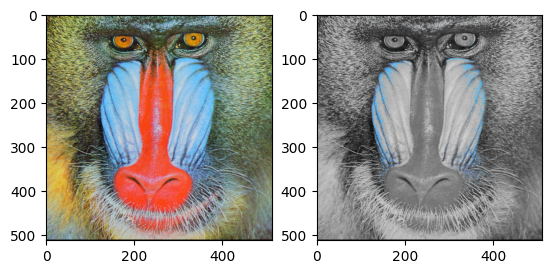

In [19]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

bro = cv.imread('/content/drive/MyDrive/PCVK MINGGU 3/Images/mandrill.tiff')
bro_rgb = cv.cvtColor(bro, cv.COLOR_BGR2RGB)

lower_orange = np.array([0, 100, 150], dtype=np.uint8)
upper_orange = np.array([100, 200, 255], dtype=np.uint8)
mask_orange = cv.inRange(bro_rgb, lower_orange, upper_orange)

# inverse mask oranye (oranye menjadi putih, latar belakang menjadi hitam)
mask_orange_inv = cv.bitwise_not(mask_orange)

# mengubah background menjadi gray
gray = cv.cvtColor(bro, cv.COLOR_BGR2GRAY)
bro = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

# menggabungkan gambar oranye dan background
out = cv.bitwise_and(bro_rgb, bro_rgb, mask=mask_orange)
out_bg = cv.bitwise_and(bro, bro, mask=mask_orange_inv)
result = cv.add(out, out_bg)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(bro_rgb)
ax[1].imshow(result)
plt.show()